<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/VideoGame_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video game Sales
Class example in Simply Learn. Instr: Sujata Date 31 Mar 24

**Class task**: Find insights to data. Engg features after data wrangling and iden most imp features. Implied- get dat ready for Ml modueles.

*   **My Aims**: Make a slick code. Relegate repetitive eda tasks into module and focus on analytics.
*   Learn new coding techniques in colab
*   Make a notebook template for data analysis
*   Keep incrementing my daya analysis toolkit library



##Tableau initial visualisation of data
Fastest method to eyeball data was using Tableau as it handles mistyped data very well. My tableau visualisation story published at: https://public.tableau.com/shared/BYGQM8G6S?:display_count=n&:origin=viz_share_link

### Initial analysis


1.   The data is incomplete post 2016 and fragmented: Cant make a comprehensive Y0Y analysis.
2.   Large blanks 276 values in year. Cant impute this without domain knowledge.
3.   Few Nulls and faulty values can be manually filled up as applyhing mean will illogical. Nearest values to corresponding fields taken.
4.   Top publishers have changed over the years. Regional variation is stark

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Pt to note delare only libraries called for in main current notebook. Libraries required by functions in modules are declared only in module.

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

# Made a library of my EDA function and plotting comparision for reuse in projects
import rak_analysis_lib as rak


# In my main code. Test import of module
print(rak.test_function())

# Load sample data
data = rak.load_data("vgsales test excel.xlsx")
data.info()
type(data)

# EDA
rak.data_summary(data)



Hello your module rak_analysis_lib! has been succesfully imported


##Data Wragling
Clean data Using by Library function and manual inspection. The colab interactive display is quick way to spot data inconsistancies

In [ ]:
# Execute the code only once
'''
rak.data_summary(data)
data.isnull().sum()
data.columns
data.dtypes
display(data)
data.drop('Unnamed: 11',axis=1,inplace=True)
data.loc[4453, 'Other_Sales'] = 0.47 ----I manually changed this as ther is only one entry
data['Genre'].unique()

# The year Nan have 271 values I will not impute them but set them to arbitary value 1900
data.loc[data['Year'].isnull(), 'Year'] = 1900

# Platform has only 2 Nan
data.loc[data['Platform'].isnull(), 'Platform'] = 'unknown'
# Filter data where Genre is null
Genre_null = data[data['Genre'].isna()]

# Print the filtered data
display(Genre_null)
# I have iden Nan from colab interactive diaplay and amended based on domain knowledge
for i,j in {35:'Shooter',95:'Shooter',890:'Shooter',930:'Sports',949:'Misc',976:'Misc'}.items():
    data.loc[i, 'Genre'] = j


# Filter data where Publisher is null
publisher_null = data[data['Publisher'].isna()]
data['Publisher'].unique()
#unkown iisa catagory of publishers I will fillna with that
# Print the filtered data
print(publisher_null)
display(publisher_null)
data.loc[data['Publisher'].isnull(), 'Publisher'] = 'Unknown'
# Change all field names to lower cases rem blanks
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace(' - Mn','')
data.rename(columns={'na_sales_-_mn': 'na_sales'}, inplace=True)
'''
data.isnull().sum()
display(data)
# Save data before outlier treatment to G drive: My restart point of proj videogames_1
data.to_csv('/content/drive/My Drive/Dataset/videogames_1.csv', index=False)

### Outlier treatment
**My Exploration**
Statistical understanding of data distr is most imp. Dont write easiest code.
Out of the various methods: clipping is simplest, but its surgery. Your models are inert to predictions on extreme ranges.

Winsorize just shifts the outliers to inner percentile. This might be suitable in many cases.

Steps before you decide: Histogram> check skewness>

Many other transformations.

**Key take Away**
This is a important step as you will loose info after these transformation

Many more methods available.

Before modelling all numeric data will be squeezed through stdscalar function and focefully normalised but results will be poor for logistic regression




In [ ]:
# Load sample data
data = rak.load_data("videogames_1.csv")

In [ ]:
# Check Skewness and normality of df
# Classify tail function checks data in the tail and classified it as light/stable/heavy
rak.classify_tail(data)
# Check normality applies wilk-shapario for notmality
rak.check_normality(data)
# deduction if heavy tailed dont clip prefer winsorize
# if non normal keep not while applying tstat Anova etc where normality is base condition

Column Name          Tail Index   Classification 
---------------------------------------------
rank                 6.649716845093659e-05 Stable         
name                 N/A          Not applicable 
platform             N/A          Not applicable 
year                 -5.933608394211571 Heavy Tail     
genre                N/A          Not applicable 
publisher            N/A          Not applicable 
na_sales             18.7996274037923 Light Tail     
eu_sales             18.893332244866677 Light Tail     
jp_sales             11.226501848304945 Light Tail     
other_sales          24.223961337020416 Light Tail     
global_sales         17.400645097552445 Light Tail     
Column Name          Shapiro Index   Classification 
--------------------------------------------------
rank                 0.0000 Not Normal     
name                 N/A Not applicable 
platform             N/A Not applicable 
year                 0.0000 Not Normal     
genre                N/A Not applicab

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Choose clip or winsorize
#Call the outlier funcction for cliping
exclude_list = ['rank','year']
df=pd.DataFrame()
df=rak.treat_outliers_clip(data.copy(),exclude_list)
display(df.describe())
print(data.describe())

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2004.669117,0.161686,0.072185,0.023591,0.024857,0.328819
std,4791.853933,14.672342,0.197668,0.096439,0.037706,0.033256,0.354541
min,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,0.600000,0.275000,0.100000,0.100000,1.085000


If you winsorize the outliers

In [ ]:
# Choose  winsorize
#Call the outlier funcction for cliping
exclude_list = ['rank','year']

df=pd.DataFrame()

# The winzorize function takes df and exclude list nad alpha parameter for percentile replacement, default 5 % not mandatory
df=rak.winsorize_numeric_columns(data.copy(), exclude_list, 0.05)
display(df.describe())
print(data.describe())

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2004.669117,0.194771,0.100340,0.045921,0.032076,0.400724
std,4791.853933,14.672342,0.283570,0.168366,0.095465,0.052646,0.535974
min,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,1.060000,0.630000,0.360000,0.200000,2.040000


               rank          year      na_sales      eu_sales      jp_sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2004.669117      0.264667      0.146540      0.077820   
std     4791.853933     14.672342      0.816683      0.505177      0.309864   
min        1.000000   1900.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        other_sales  global_sales  
count  16598.000000  16598.000000  
mean       0.048082      0.537441  
std        0.188615      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [ ]:
display(data.describe())

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2004.669117,0.264667,0.146540,0.077820,0.048082,0.537441
std,4791.853933,14.672342,0.816683,0.505177,0.309864,0.188615,1.555028
min,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000



Analyzing column: eu_sales


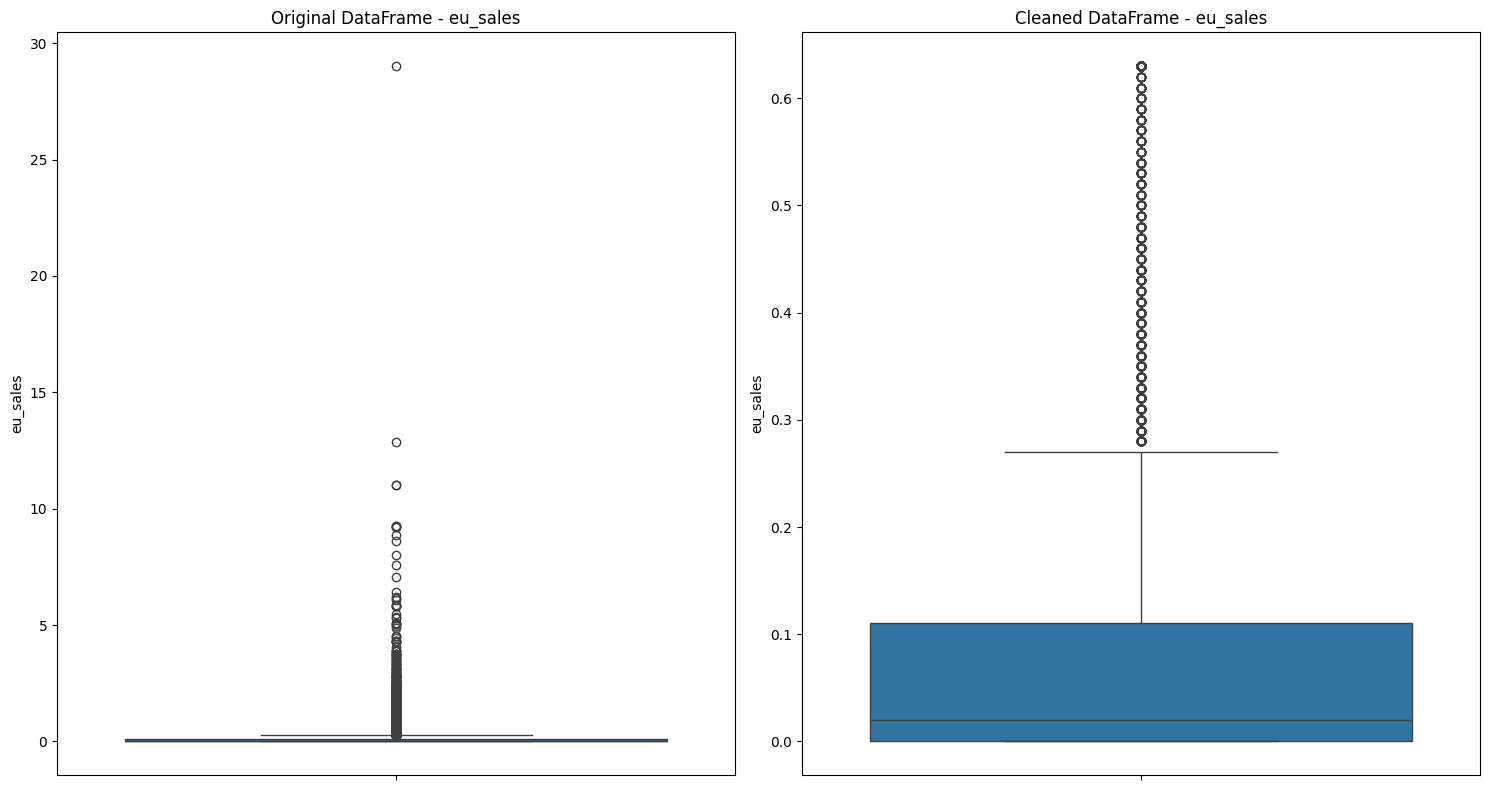

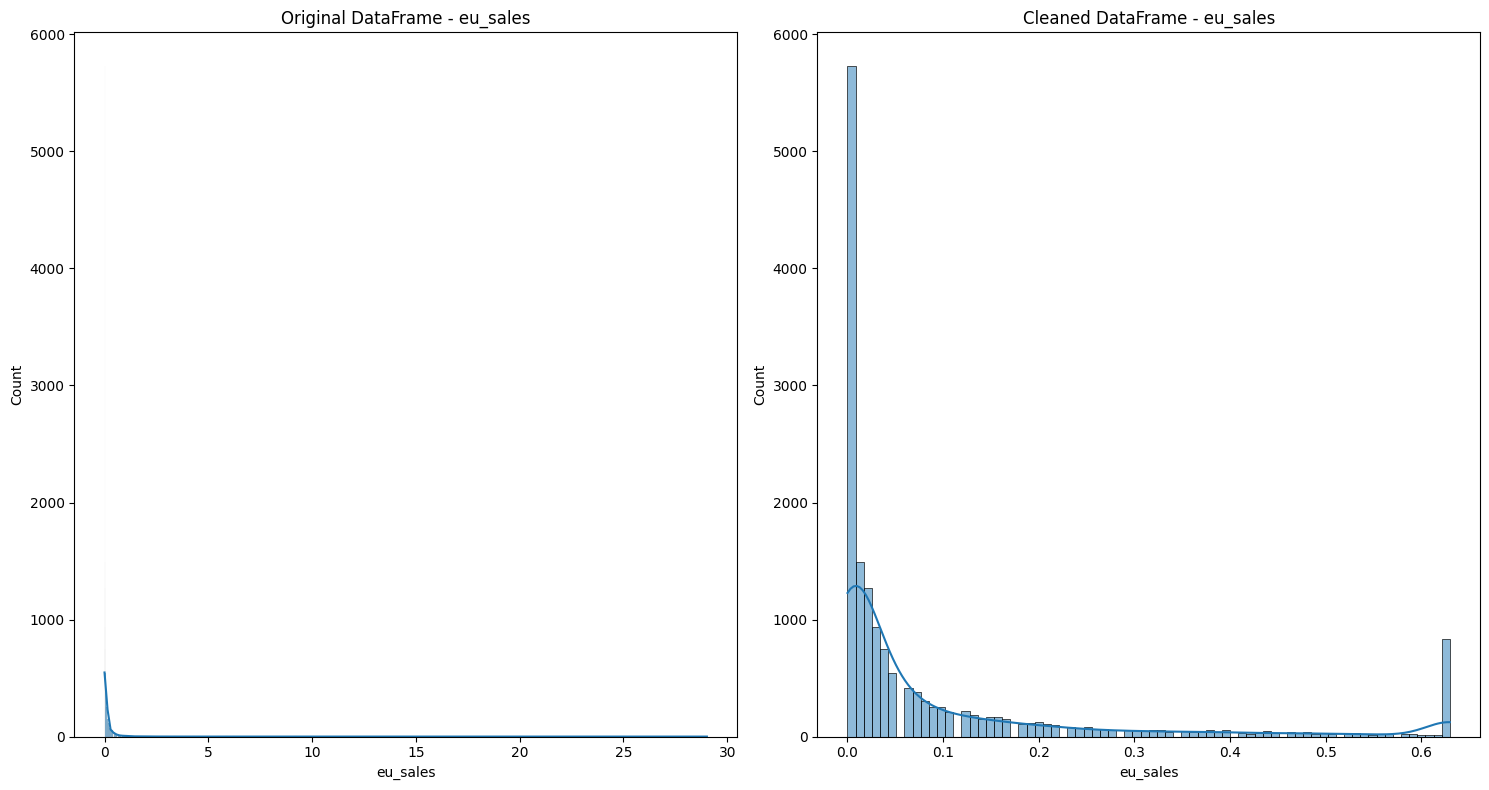


Analyzing column: global_sales


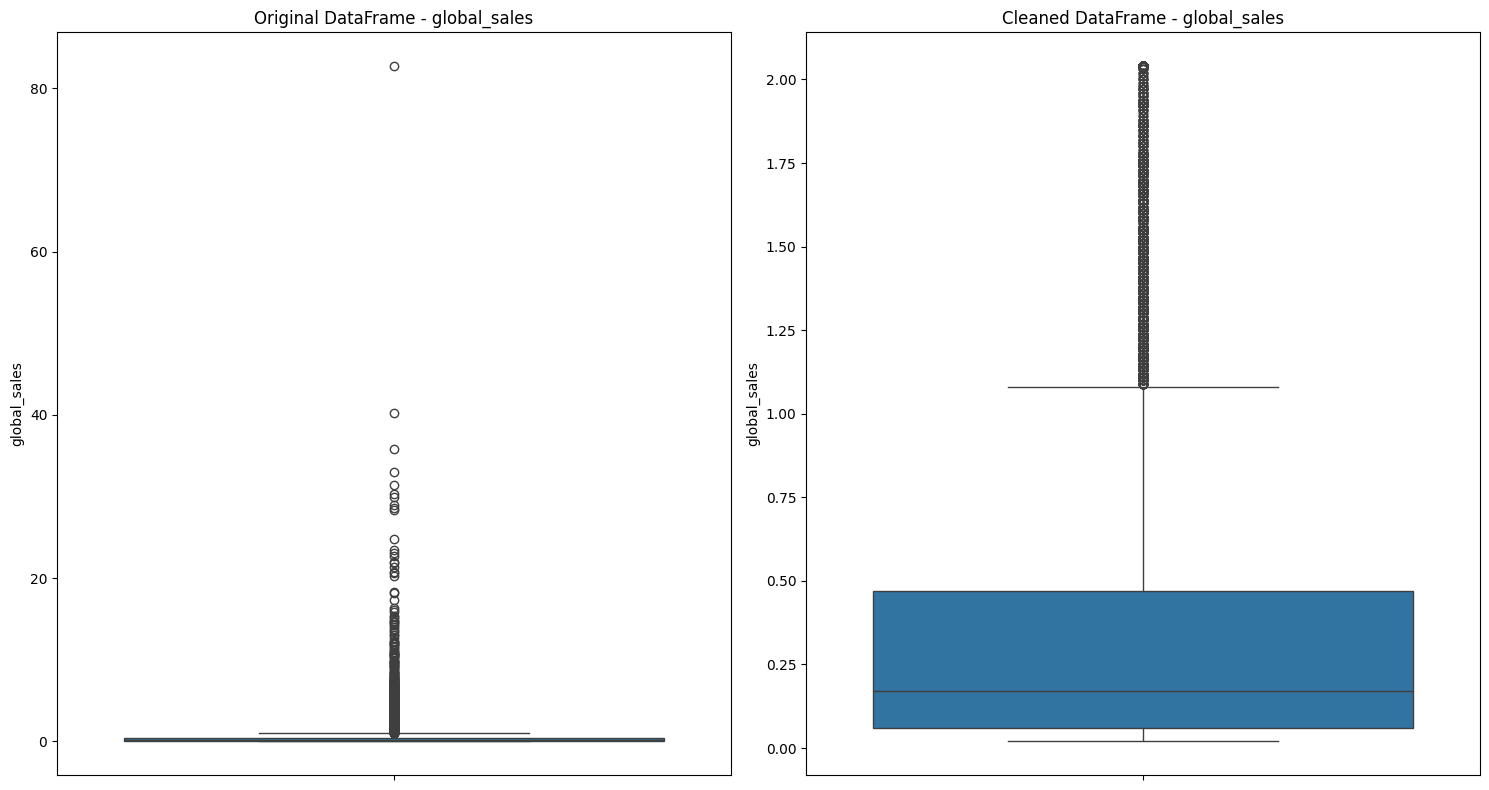

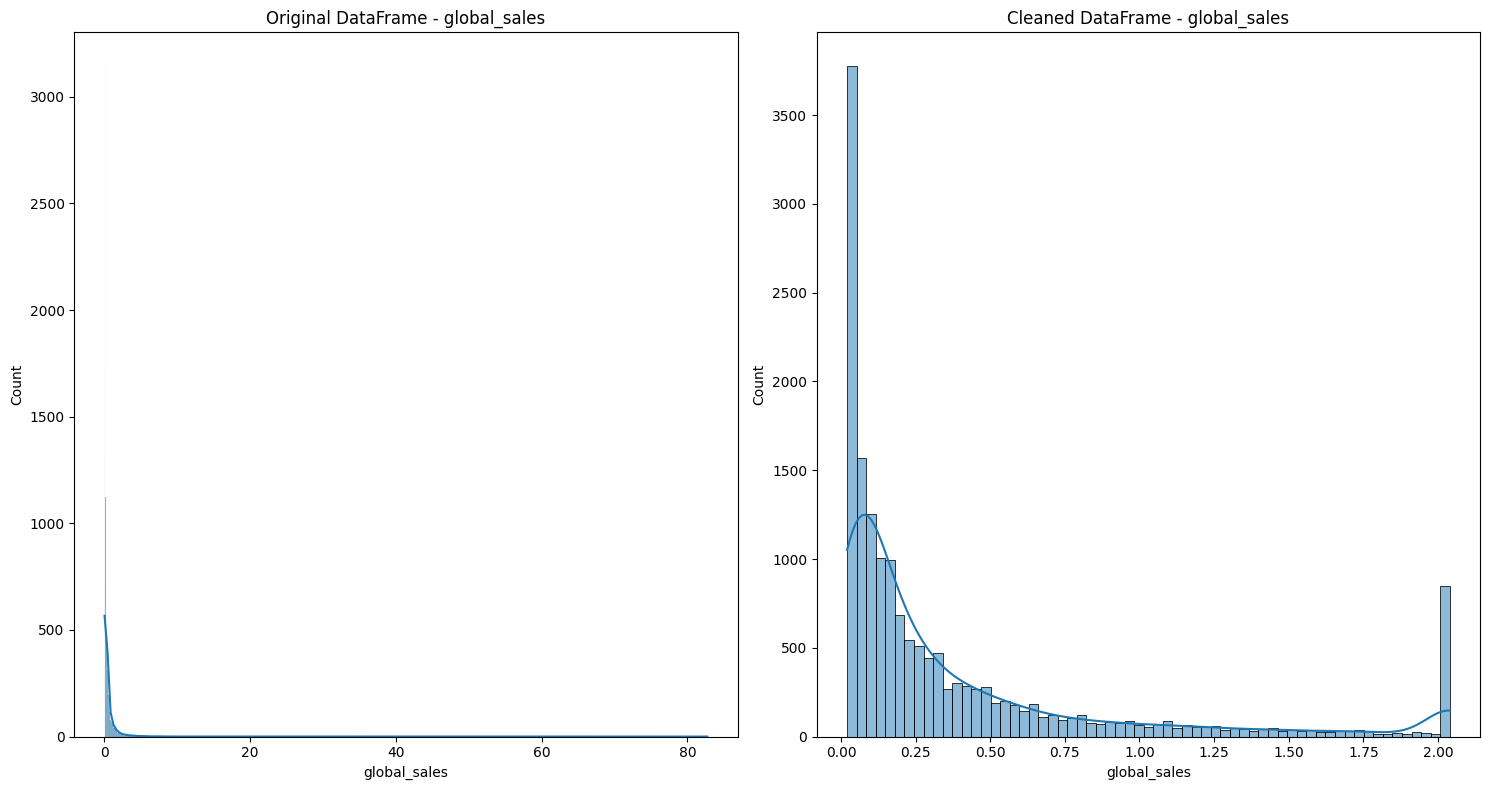


Analyzing column: jp_sales


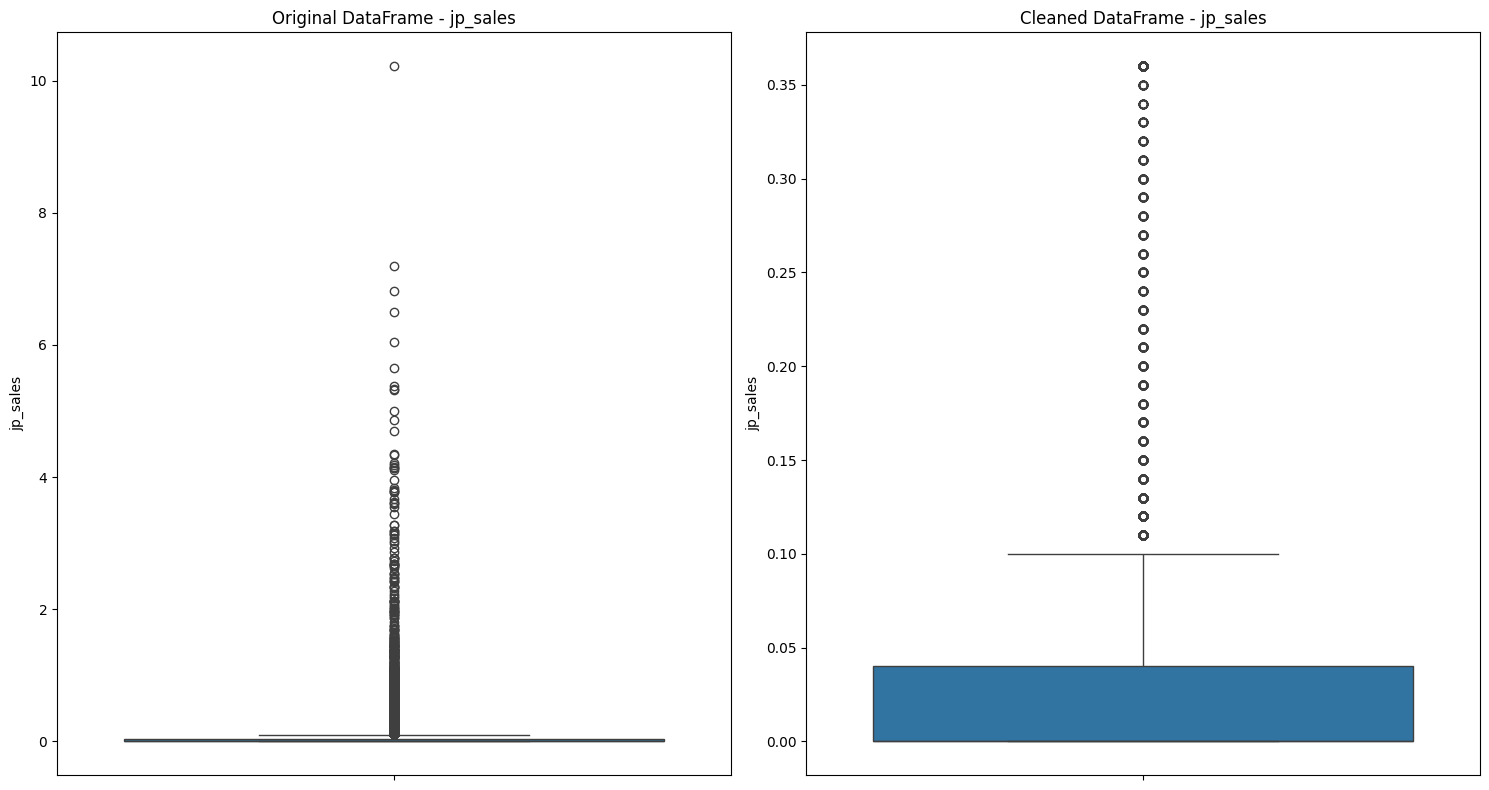

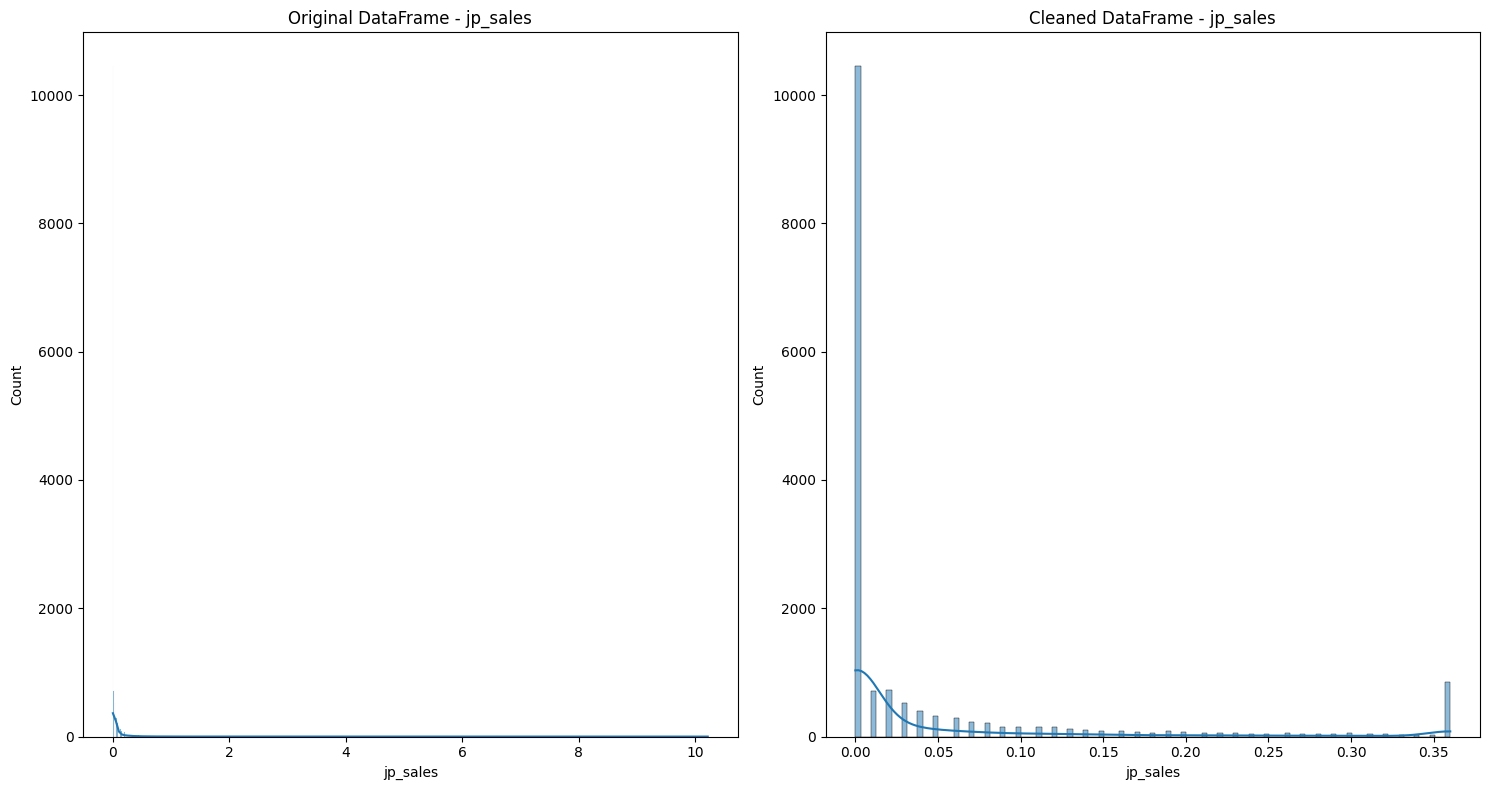


Analyzing column: na_sales


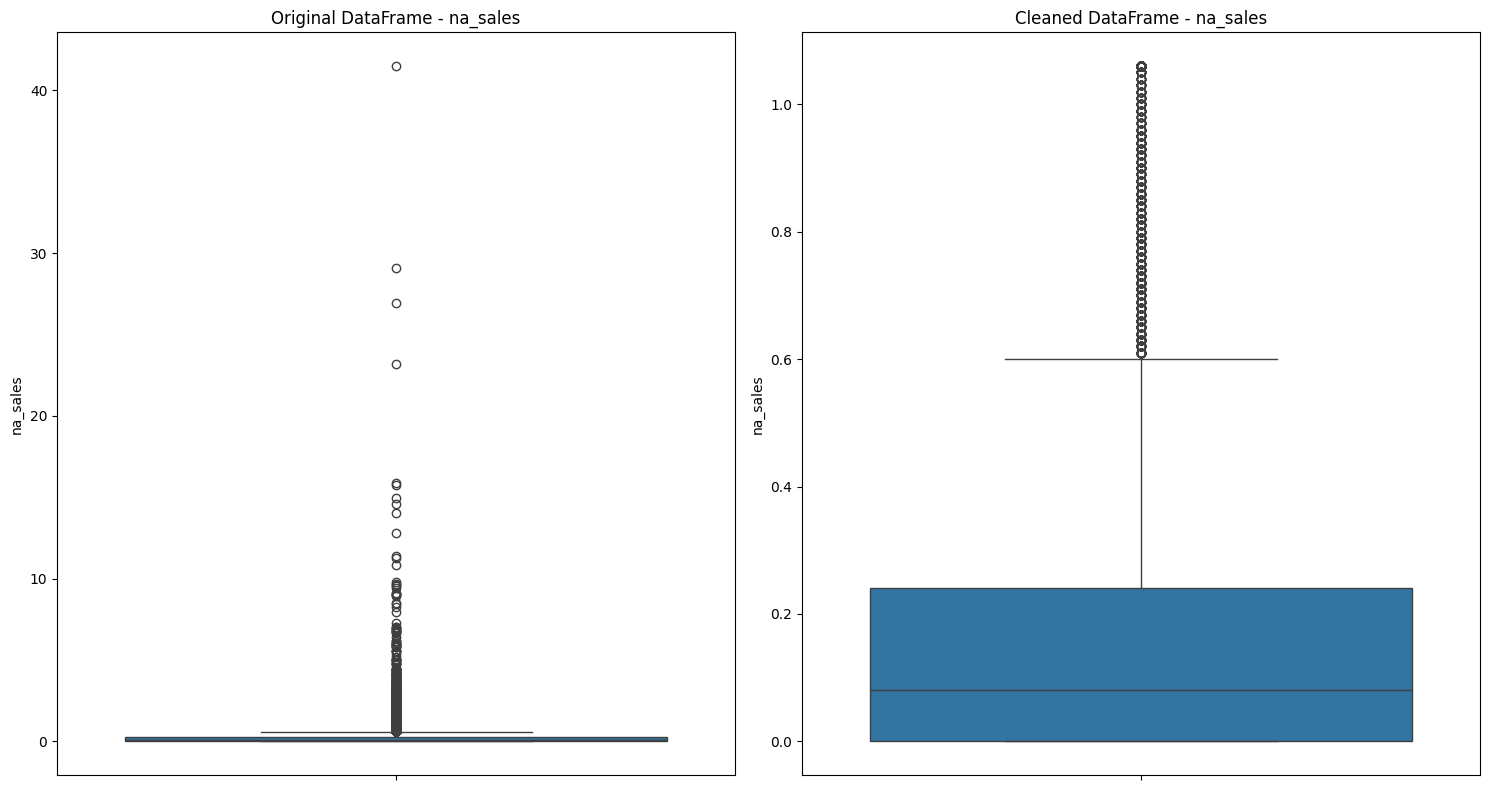

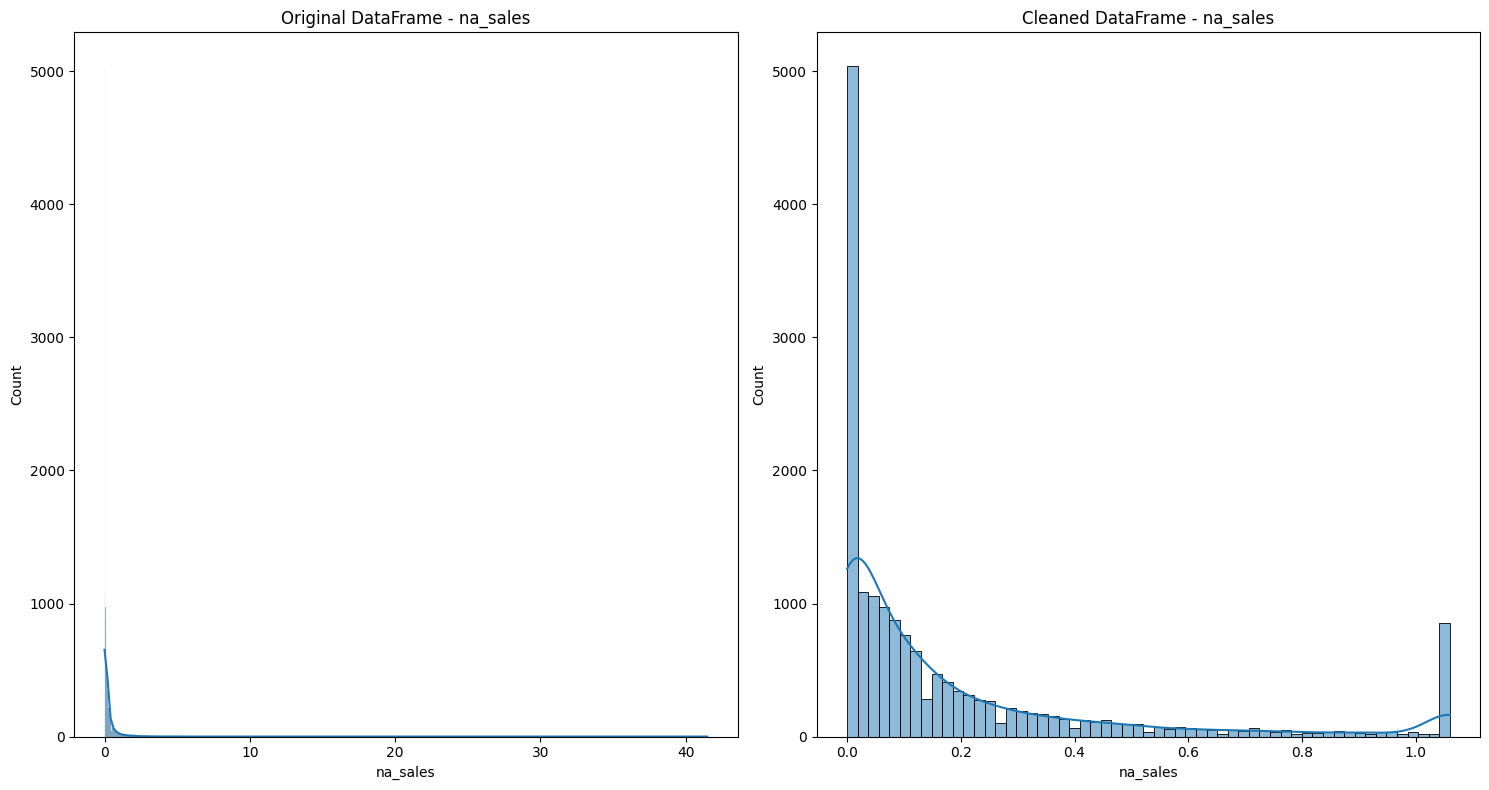


Analyzing column: other_sales


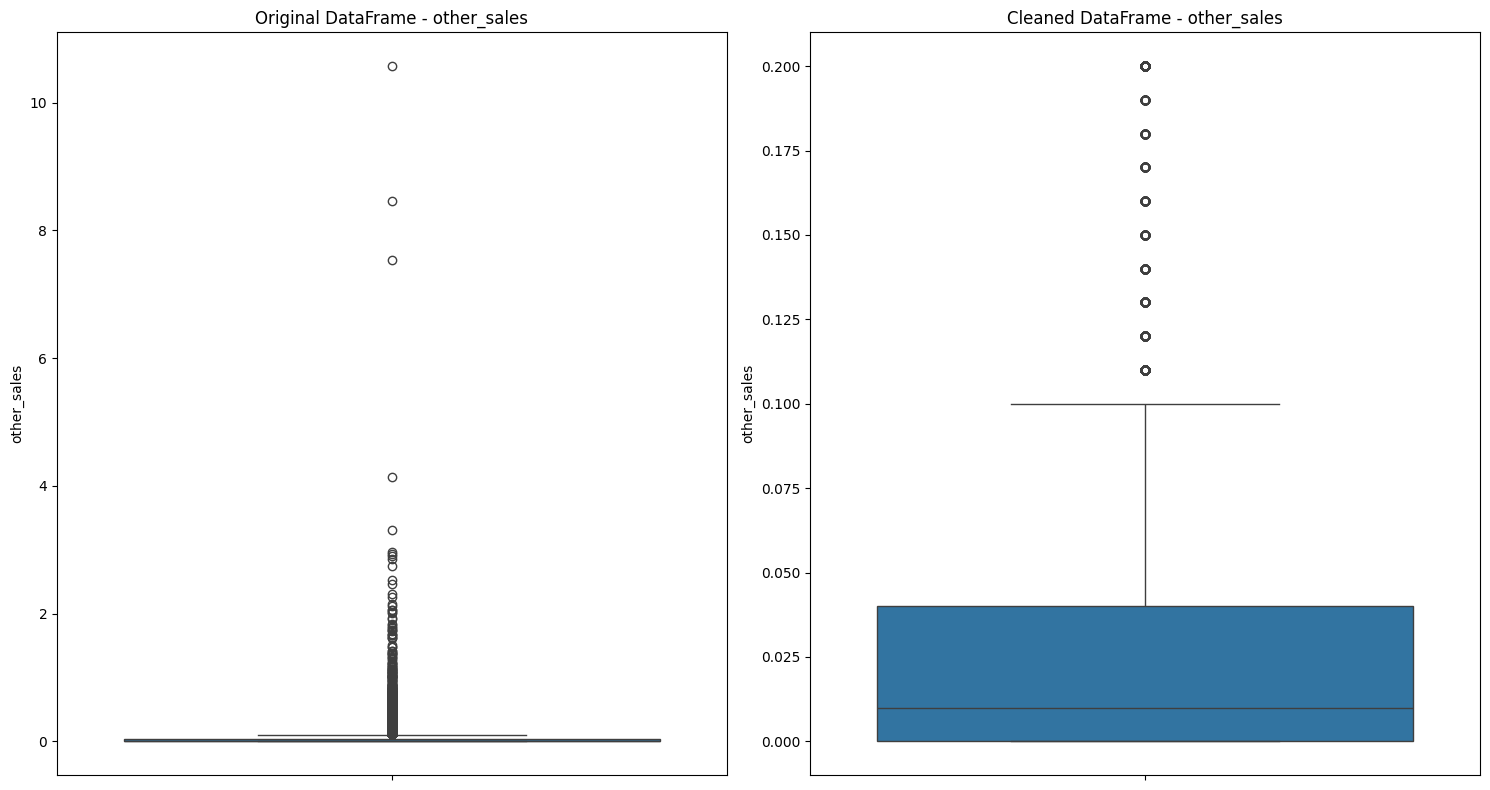

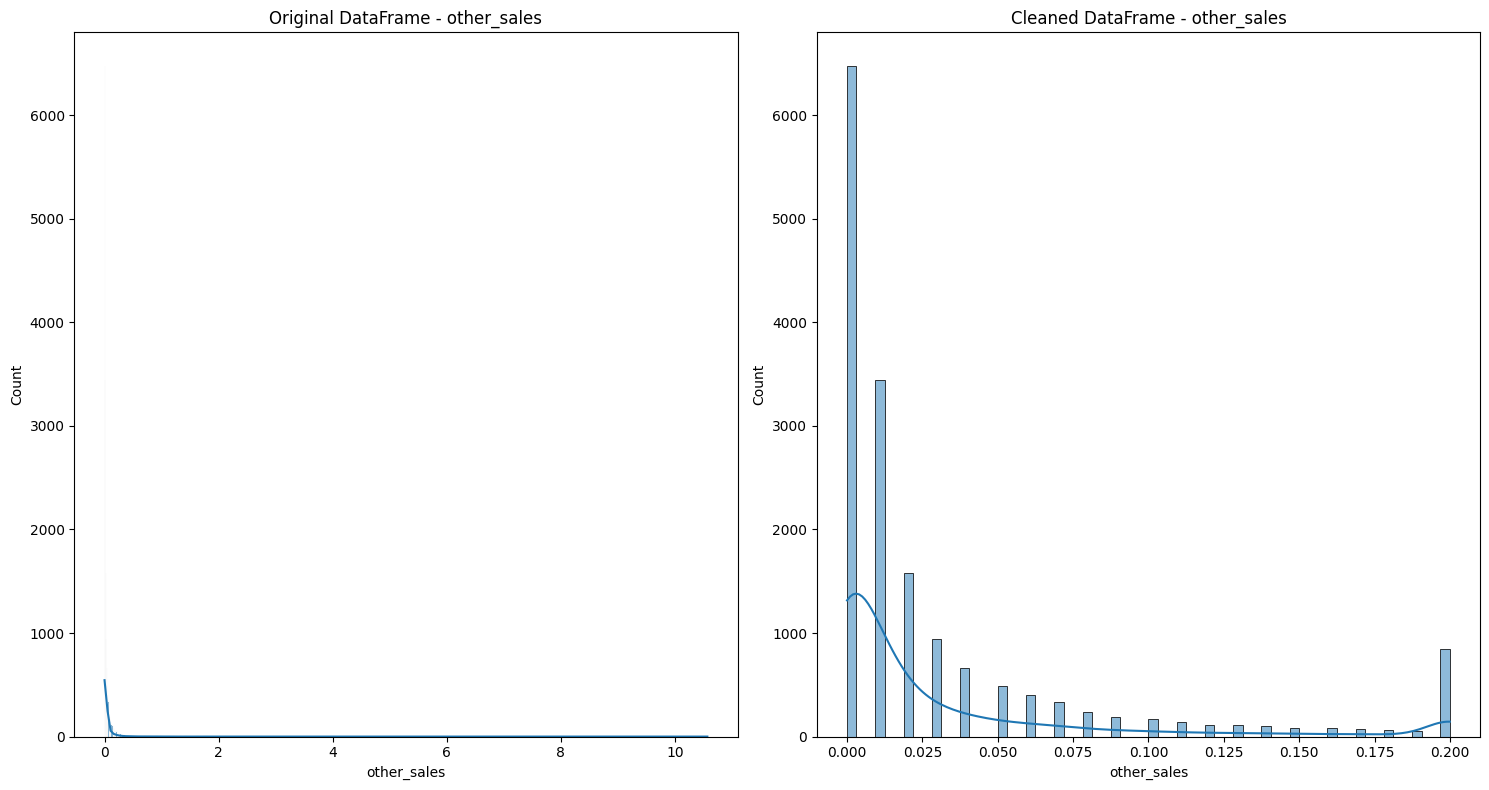

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,1.06,0.63,0.36,0.2,2.04
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,1.06,0.63,0.36,0.2,2.04
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,1.06,0.63,0.36,0.2,2.04
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,1.06,0.63,0.36,0.2,2.04
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.06,0.63,0.36,0.2,2.04
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.02
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.02
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.0,0.02
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16598 non-null  int64  
 4   genre         16598 non-null  object 
 5   publisher     16598 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


"\ndf.drop(['na_Sales_Pct_Increase', 'eu_Sales_Pct_Increase',\n       'jp_Sales_Pct_Increase', 'other_Sales_Pct_Increase',\n       'global_Sales_Pct_Increase'], axis=1,inplace=True)\n       "

In [ ]:
# Parallel comparision will export to my module

df_cleaned=df.copy()
# Function to plot the treated  outliers with the original df
# ... your data preprocessing code leading up to df_cleaned ...
exclude_list = ['rank', 'year']

# Call the function from module
rak.compare_distributions(data, df_cleaned,exclude_list)
# I deeciide to accept outlier treatment and proceed I will
df=df_cleaned
df.dtypes
df.isna().sum()
df['year']=df['year'].astype(int)
display(df)
df.info()
df.columns
# Save data after outlier treatment to G drive: My restart point of proj videogames_2
df.to_csv('/content/drive/My Drive/Dataset/videogames_3.csv', index=False)
'''
df.drop(['na_Sales_Pct_Increase', 'eu_Sales_Pct_Increase',
       'jp_Sales_Pct_Increase', 'other_Sales_Pct_Increase',
       'global_Sales_Pct_Increase'], axis=1,inplace=True)
       '''

## Feature Engg
Colabs generates and suggests visualisations 😀

**Key experiment**

*   Create features with pct_change function
*  using f-strings to name fields in df
*   Moving Avgs- experiment failed due to repeated indexing error for data blanks. Check the rolling window with stochastic data next project.
*   Binning of data: Bucketed rank
*   Dimensionality reduction: tried in Genre Mapping

**Key Take-Away/Furtehr exploration**

*   follow field naming conventions imdt after importing df else its a nightmare
*   Slick meainingful name following format made fstring application easy.
*   Moving avg rolling windows create indexing errors.Use only in data rich cases.

In [ ]:
import numpy as np
# Create year feature
df["year"] = pd.to_datetime(df["year"], format="%Y").dt.year
# Troubleshooting
print(df.dtypes)
def calculate_publisher_sales_yoy_pct_change(df, region):
    df = df.sort_values(['publisher', 'year'])  # Ensure data is sorted

    df[f"{region}_Sales_YoY_Pct_Increase"] = (
        df.groupby(["publisher", 'year'])[f"{region}_sales"]
        .pct_change() * 100)
    print(df.groupby(["publisher", 'year'])[f"{region}_sales"].head())

    return df
for region in ['na', 'eu', 'jp', 'other', 'global']:
    df = calculate_publisher_sales_yoy_pct_change(df, region)
df.replace([np.inf, -np.inf], 0, inplace=True)
print(df.info())
# Lot of Nan values generaed due to missing data between years
df = df.fillna(0)
df.describe()
display(df)
df.isna().sum()
# Categorisation
# Rank Bucket binning
df["Rank_Bucket"] = pd.cut(df["rank"], bins=[0, 5000, 10000, df["rank"].max()],
                           labels=["Top 5000", "5001-10000", "Other"])
# Genere grouping
genre_mapping = {
    'Sports': 'Sports',  # no change
    'Platform': 'Platformer',  # actual genere is called Platformer which is jumping
    'Racing': 'Sports',  # Racing is a subgenre of Sports
    'Role-Playing': 'Role_Playing',  # No change- major genre
    'Puzzle': 'Puzzle',  # no change
    'Misc': 'Other',  # A more general catch-all category
    'Shooter': 'Action',  # Shooters fall under the Action umbrella
    'Simulation': 'Simulation',  # no change
    'Action': 'Action',  # no change
    'Fighting': 'Action',  # Fighting fits within the Action genre
    'Adventure': 'Action',  # kind of like action and exploration
    'Strategy': 'Strategy'  # Keep as its own category
}

df['Genre_Group'] = df['genre'].map(genre_mapping) # Use map function to apply all rows
df['Genre_Group'] = df['Genre_Group'].astype('category')
df['Genre_Group'].unique()
# Check my results
print(df['Genre_Group'].dtype)
print(df[['genre', 'Genre_Group']])


rank              int64
name             object
platform         object
year              int32
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object
15706    0.01
12349    0.06
14130    0.00
16449    0.00
13057    0.01
         ... 
16423    0.00
10756    0.02
2409     0.00
10945    0.07
13684    0.02
Name: na_sales, Length: 6319, dtype: float64
15706    0.01
12349    0.00
14130    0.03
16449    0.01
13057    0.03
         ... 
16423    0.00
10756    0.06
2409     0.00
10945    0.02
13684    0.02
Name: eu_sales, Length: 6319, dtype: float64
15706    0.00
12349    0.00
14130    0.00
16449    0.00
13057    0.00
         ... 
16423    0.01
10756    0.00
2409     0.36
10945    0.00
13684    0.00
Name: jp_sales, Length: 6319, dtype: float64
15706    0.00
12349    0.00
14130    0.00
16449    0.00
13057    0.01
         ... 
16423    0.00
10756    0.01
2409     0.00

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_Sales_YoY_Pct_Increase,eu_Sales_YoY_Pct_Increase,jp_Sales_YoY_Pct_Increase,other_Sales_YoY_Pct_Increase,global_Sales_YoY_Pct_Increase
15706,15709,Pirates: Legend of the Black Buccaneer,PS2,2006,Adventure,10TACLE Studios,0.01,0.01,0.00,0.00,0.02,0.0,0.0,0.000000,0.0,0.000000
12349,12351,Panzer Tactics,DS,2007,Strategy,10TACLE Studios,0.06,0.00,0.00,0.00,0.06,0.0,0.0,0.000000,0.0,0.000000
14130,14132,Boulder Dash: Rocks!,DS,2007,Puzzle,10TACLE Studios,0.00,0.03,0.00,0.00,0.03,-100.0,0.0,0.000000,0.0,-50.000000
16449,16452,King's Bounty: Armored Princess,PC,2009,Role-Playing,1C Company,0.00,0.01,0.00,0.00,0.02,0.0,0.0,0.000000,0.0,0.000000
13057,13059,Men of War: Assault Squad,PC,2011,Strategy,1C Company,0.01,0.03,0.00,0.01,0.05,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16423,16426,SoniPro,3DS,2014,Adventure,imageepoch Inc.,0.00,0.00,0.01,0.00,0.02,0.0,0.0,-66.666667,0.0,-33.333333
10756,10758,Wasteland 2,PC,2015,Role-Playing,inXile Entertainment,0.02,0.06,0.00,0.01,0.10,0.0,0.0,0.000000,0.0,0.000000
2409,2411,Monster Strike 3DS,3DS,2015,Action,"mixi, Inc",0.00,0.00,0.36,0.00,0.86,0.0,0.0,0.000000,0.0,0.000000
10945,10947,Yourself Fitness,XB,2004,Sports,responDESIGN,0.07,0.02,0.00,0.00,0.09,0.0,0.0,0.000000,0.0,0.000000


category
              genre   Genre_Group
15706     Adventure        Action
12349      Strategy      Strategy
14130        Puzzle        Puzzle
16449  Role-Playing  Role_Playing
13057      Strategy      Strategy
...             ...           ...
16423     Adventure        Action
10756  Role-Playing  Role_Playing
2409         Action        Action
10945        Sports        Sports
13684        Sports        Sports

[16598 rows x 2 columns]


<ipython-input-36-b046b24e9cf0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='eu_sales', y='Genre_Group', inner='box', palette='Dark2')


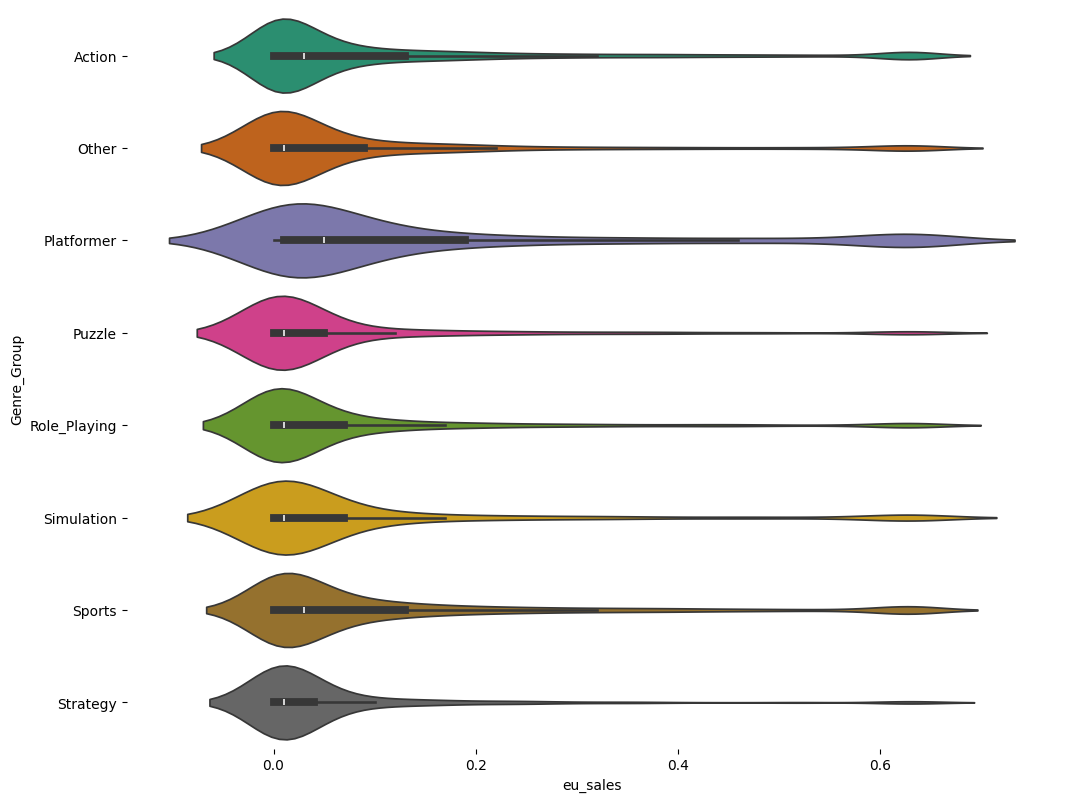

In [ ]:
# @title Genre_Group vs eu_sales

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Genre_Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='eu_sales', y='Genre_Group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Timeline analysis

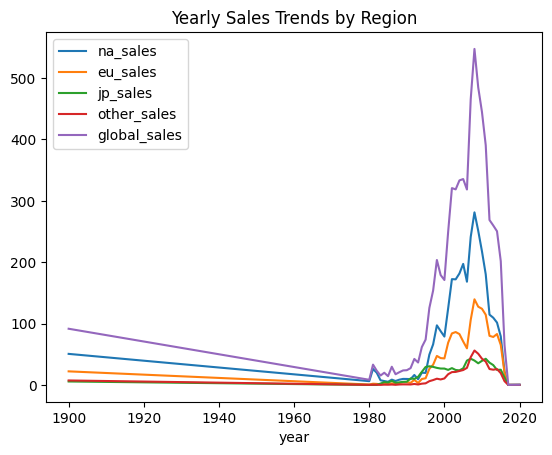

In [ ]:
# Sales by region
df.groupby("year")[["na_sales", "eu_sales", "jp_sales", "other_sales", "global_sales"]].sum().plot(kind="line")
plt.title("Yearly Sales Trends by Region")
plt.show()


## Interactive plot
My experiment with colab interactive plot, Data of top 10 publishers.
*  Selection by drop down list. Can filter parameters for visualisation in a colab notebook by using ipwidgets.
* Widgets and be tweaked for interactively entering data into a notebook
* Saw a slick implemetation in google earth building data download saved in my Edge. Tutorial in colab widgets tutorial.

**Open in Colabs to view**

In [ ]:
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
# Get top 10 publishers by global sales
# Group by 'publisher' and sum 'global_sales', then sort the results
top_publishers_by_global_sales = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False)

# Get the top 10 publishers
top_10_publishers = top_publishers_by_global_sales.head(10)
# Trouble shoot - logic error
# top_10_publishers = df.sort_values('global_sales', ascending=False)['publisher'].unique()[:10]

# Create Dropdown Widget (using top 10 publishers)
publisher_dropdown = widgets.Dropdown(
    options=top_10_publishers,
    value=top_10_publishers[0],
    description='Publisher:'
)
# Bin the years and make bar chart
def update_plot(publisher):
    filtered_df = df[df['publisher'] == publisher].copy()

    # Bin years (adjust bin size as needed)
    year_bins = [1995, 2000, 2005, 2010, 2015, 2024]
    filtered_df.loc[:,'year_bin'] = pd.cut(filtered_df['year'], bins=year_bins)

    # Grouped bar chart
    grouped_data = filtered_df.groupby('year_bin')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum()
    grouped_data.plot(kind='bar')

    plt.title(f"Sales Trends for {publisher} (Grouped by Year)")
    plt.xlabel('Year (Binned)')  # Add x-axis label
    plt.ylabel('Sales')          # Add y-axis label
    plt.show()
# Link the interact function to plot function
widgets.interact(update_plot, publisher=publisher_dropdown)


interactive(children=(Dropdown(description='Publisher:', options=('Microsoft Game Studios', 'Ubisoft', 'Konami…

<function __main__.update_plot(publisher)>

## Data Visualisation

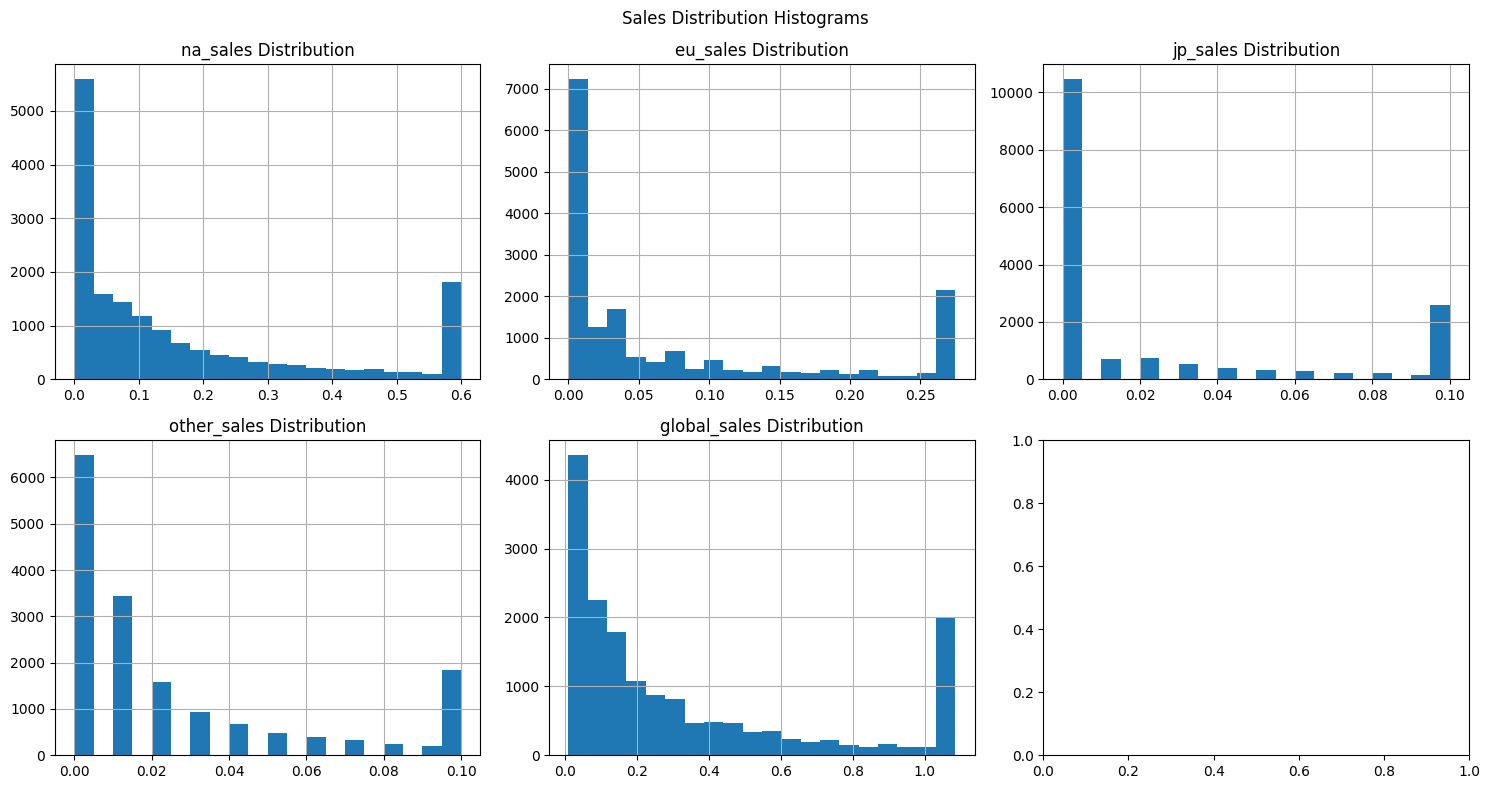

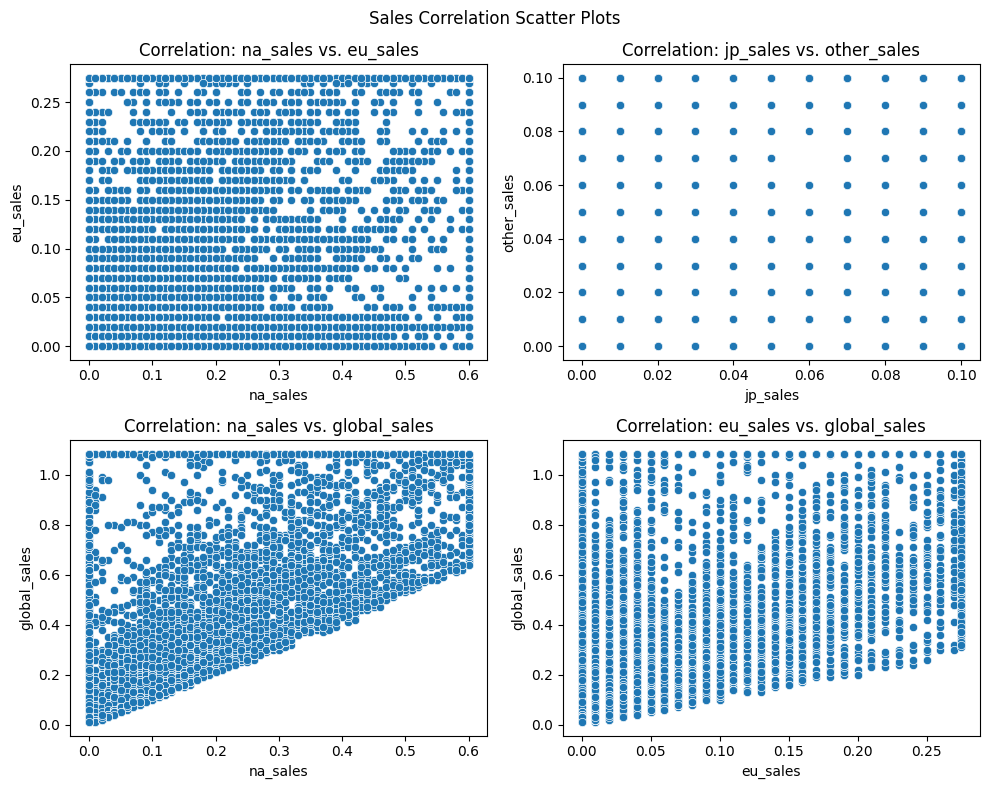

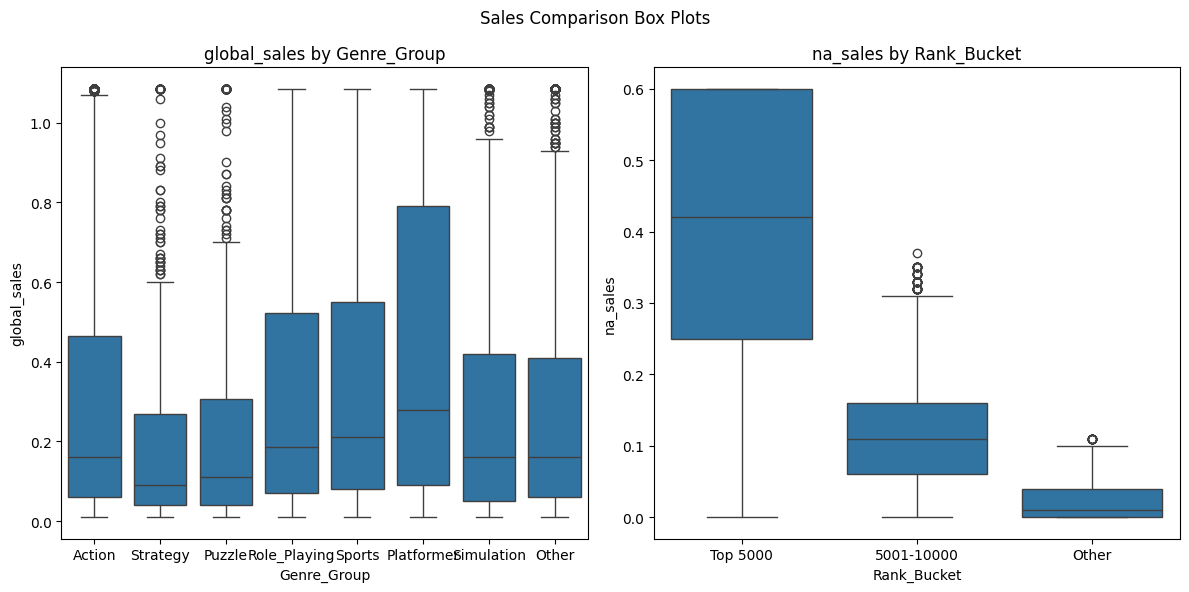

In [ ]:

# Creating subplots of two rows and 3 columns. total 6
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Create 2 rows, 3 columns of subplots

# Flatten axes for easier iteration
axes = axes.flatten()
# My regions
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales", "global_sales"]

for i, region in enumerate(regions):
    df.hist(column=region, bins=20, ax=axes[i])
    axes[i].set_title(f"{region} Distribution")

fig.suptitle("Sales Distribution Histograms")
fig.tight_layout()  # Adjust spacing to prevent overlaps
plt.show()
## Scatter Plots

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  #  figsize made bigger
axes = axes.flatten()

#  scatter plots (play with regions)
# The scatter plot are meaningless.
regions = [('na_sales', 'eu_sales'), ('jp_sales', 'other_sales'),
           ('na_sales', 'global_sales'), ('eu_sales', 'global_sales')]

for i, (x_region, y_region) in enumerate(regions):
    sns.scatterplot(data=df, x=x_region, y=y_region, ax=axes[i])
    axes[i].set_title(f"Correlation: {x_region} vs. {y_region}")

fig.suptitle("Sales Correlation Scatter Plots")
fig.tight_layout()
plt.show()

## Box Plots

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Example box plots (adjust variables as needed)
comparisons = [('Genre_Group', 'global_sales'), ('Rank_Bucket', 'na_sales')]

for i, (x_var, y_var) in enumerate(comparisons):
    sns.boxplot(data=df, x=x_var, y=y_var, ax=axes[i])
    axes[i].set_title(f"{y_var} by {x_var}")

fig.suptitle("Sales Comparison Box Plots")
fig.tight_layout()
plt.show()

### Data Visualisation on Rank Bucket
Bar and pie chart

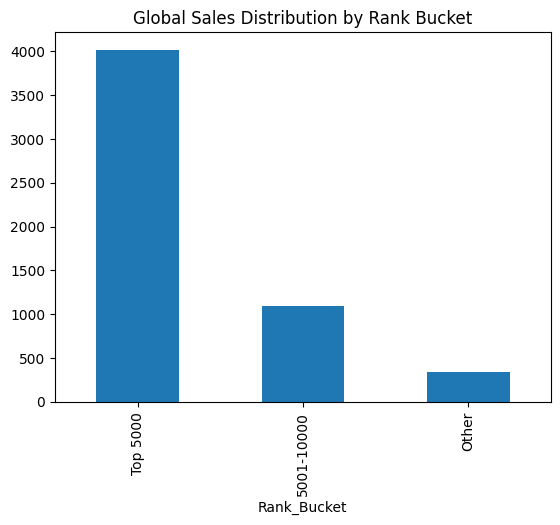

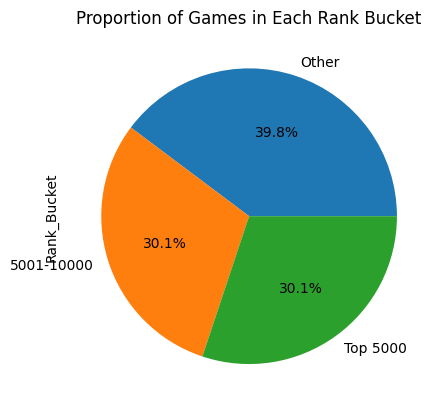

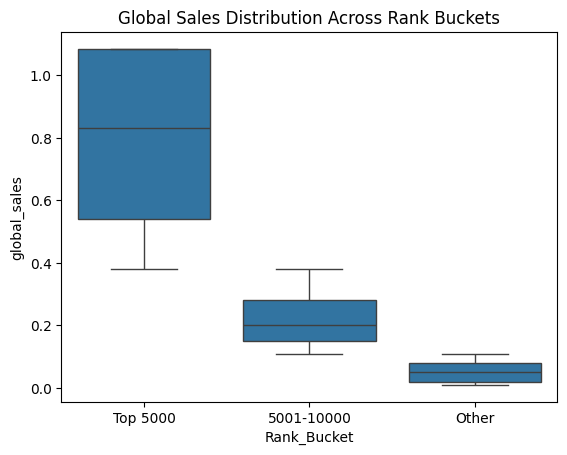

In [ ]:
# Bar chart rank bucket vs global sales
df.groupby('Rank_Bucket')['global_sales'].sum().plot(kind='bar')
plt.title("Global Sales Distribution by Rank Bucket")
plt.show()

# Pie chart of no of games in each bucket
df['Rank_Bucket'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Games in Each Rank Bucket")
plt.show()

# Box plot Sales distr across rk
import seaborn as sns

sns.boxplot(data=df, x='Rank_Bucket', y='global_sales')
plt.title("Global Sales Distribution Across Rank Buckets")
plt.show()


##Correlation matrix
I used function from my library
plot_corr_matrix(df,predictors)
 and for selecting numeric columns
 get_numeric_columns(df, exclude_columns=None)

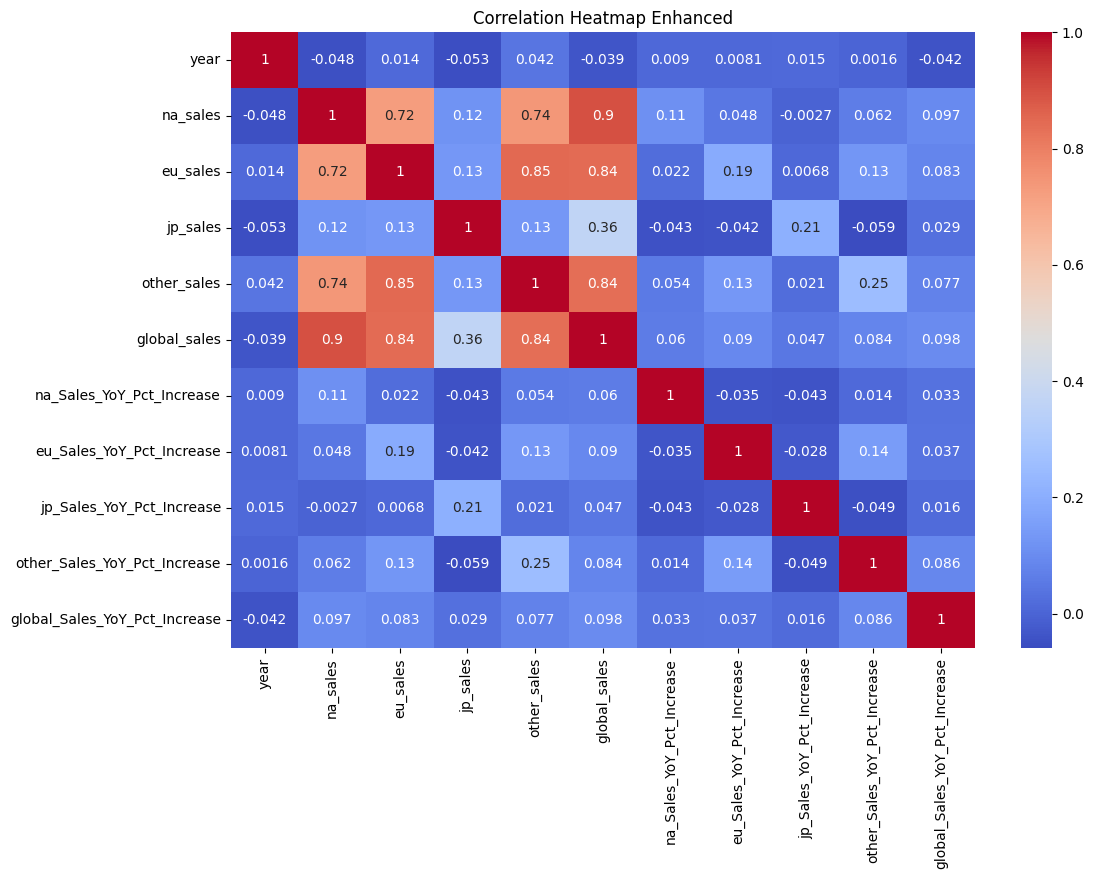

In [ ]:
# Plotting correlation matrix
# Define exclude variable list, typycally exclude rank indexes etc
exclude_columns=['rank']
predictors=rak.get_numeric_columns(df, exclude_columns)
rak.plot_corr_matrix(df,predictors)

## Experiment with AI in python
Initial experiments of how to use Artificial Intelligence in data interpretation and decision making.

You can keep tweaking the predictor/featured col list in your corr matrix and get new results. Especially useful when corr matrix is huge.

This is standalone codeblock. Data set and fetured columns are selected withot application just for testing so interpretation is meaningless.

In [ ]:
import pandas as pd
from google.colab import drive
import google.generativeai as genai

# Step 1: Mount Google Drive - Not red if running notebook from start
drive.mount('/content/drive')

# Step 2: Function to read API key from Drive
def load_api_key():
  with open('/content/drive/My Drive/Dataset/api_key.txt', 'r') as f:  # File where I store my key
    api_key = f.read().strip()  # Remove any extra whitespace
    return api_key

# Step 3: Load the API key
api_key = load_api_key()
genai.configure(api_key=api_key)


# Step 3: Load the Gemini model
model = genai.GenerativeModel('gemini-pro')

# AI model is loaded and ready

# Balance code if for any interpretation. Made this standalone to just experiment

# Step 1: Load your df- not required if run in sequence in note book
csv_file_path = '/content/drive/My Drive/Dataset/videogames_3.csv'  # Load cleaned df

# Step 2: Read the CSV file into a DataFrame
df_AI = pd.read_csv(csv_file_path)
df_AI.columns
# Step 3: Calculate the correlation matrix
matrix = df_AI[['na_sales','year',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'] ].corr()


# Step 4: Generate interpretation (Pass the matrix as plain text)
response = model.generate_content(f"Interpret the correlation matrix:\n{matrix.to_string()}")
print(response.text)
# You can engineer prompt to set significance levels and specific interpretation
# Eg relationship between features

**Interpretation:**

The correlation matrix shows the linear relationships between the different variables. The values range from -1 to 1, where:

* **-1:** Perfect negative correlation (as one variable increases, the other decreases in a linear fashion)
* **0:** No linear correlation (no relationship between the variables)
* **1:** Perfect positive correlation (as one variable increases, the other also increases in a linear fashion)

**Observations:**

* **na_sales** has a strong positive correlation with **eu_sales** (0.724) and **other_sales** (0.742), indicating that these variables tend to increase or decrease together.
* **year** has a very weak relationship with all other variables, with the strongest correlation being a negative 0.0476 with **na_sales**. This suggests that time alone has little impact on these variables.
* **global_sales** has a very strong positive correlation with all other variables, ranging from 0.83 to 0.9, indicating that increases in global sales are ass

##Machine Learning
1. This is a simple ML code for using my library function created for with kfold split, preprocessing pipeline for encoding and model fitting. I havent incl label encoding and that can be done out of the function. The whole ML code incl splitting, training fitting data is in module. **Function**: evaluate_model_regress()

2. Known code defi: Ordinal column is auto categoriesd in pipleline. In case of complex ordinal categorisation more than large, med small etc- do it manuall and slip the column in exclude list through pipeline

3. Any relevant model can be added in list. DF is small so computation not intensive

4. This is a step by step approach focussing on analysis and relegating coding. You can experiment. Yout df is unaffected consistent with goog coding practice of sending a *copy of the df with the function*.

Warnings can be ignored. Can also write code to ignore wanings.


In [ ]:
df.columns # get coln names right copy paste

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'na_Sales_YoY_Pct_Increase', 'eu_Sales_YoY_Pct_Increase',
       'jp_Sales_YoY_Pct_Increase', 'other_Sales_YoY_Pct_Increase',
       'global_Sales_YoY_Pct_Increase', 'Rank_Bucket', 'Genre_Group'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
#  1. Choose Target variable
target_variable = 'global_sales'

# 2. Feature selection (keep experimenting with features)
feature_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rank', 'year','Rank_Bucket','Genre_Group']  # Example features
# 3. Define exclude column - this will not churn the column in Standard Scalar in ppl and mantain ordinality
# Put your lable encoded and manually encoded ordinal coln here
exclude_col=['rank','year']
# 4. Specify columns for different encoding types
ordinal_features = ['Rank_Bucket']
onehot_features = ['Genre_Group']

# 5. Experiment with models and store results (Choose models as required)
models = [RandomForestRegressor(), GradientBoostingRegressor(),LinearRegression()]
results = {'Model': [], 'MSE': [],'R2Score':[]}

for model in models:
  mse,r2_scores= rak.evaluate_model_regress(df.copy(), target_variable, feature_cols.copy(), ordinal_features, onehot_features,exclude_col, model)
  results['Model'].append(model.__class__.__name__)
  results['MSE'].append(mse)
  results['R2Score'].append(mse)

# Print Result Table
print(pd.DataFrame(results))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                       Model                      MSE                  R2Score
0      RandomForestRegressor  [7.827680722891439e-07]  [7.827680722891439e-07]
1  GradientBoostingRegressor  [6.508162192264446e-06]  [6.508162192264446e-06]
2           LinearRegression    [0.01560884177085493]    [0.01560884177085493]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Evaluation of results
**Failed model**

These are extremly low scores for MSE and R2 Score indicative of overfitting of model. Needs further exploration. The Random forest regressor and Gradient boosting regressor have near perfect scores MSE score and very poor R2 scores. The entire process need to be redone incl feature engg.

We can extract coeff of features from the results to discard some features. Back to key question: What are we trying to do?

## Classfier modelling and hyper parameter
In progress

# Conclusion
This is a a test data set with huge gaps. Cant make any meaningful analysis from this. Closing further exploration on this.